In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris=iris[['sepal_length','petal_length','species']]

In [4]:
iris.rename(columns={'sepal_length':'sl','petal_length':'pl'},inplace=True)

In [5]:
iris['species'].replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [6]:
x = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values

In [7]:
print(x.shape)
print(y.shape)

(150, 2)
(150,)


In [8]:
## Spliting the x and y for training and testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 2)
(120,)
(30, 2)
(30,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [11]:
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
a=np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)
b=np.arange(start=x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)

In [13]:
xx,yy=np.meshgrid(a,b)

In [14]:
input_array = np.array([xx.ravel(),yy.ravel()]).T

In [15]:
labels=clf.predict(input_array)

In [16]:
## It's just some color for the markers....
colors = { 0 : 'red' , 1 : 'orange', 2 : 'blue'}
markers = [colors[i] for i in y_train]

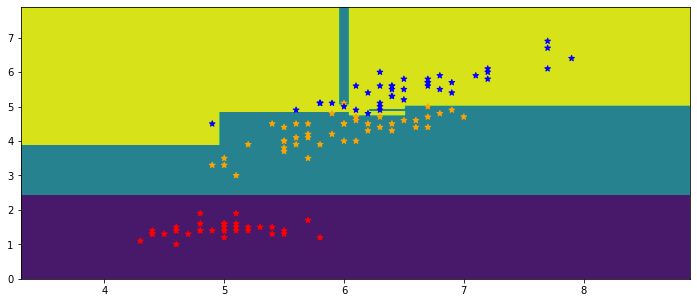

In [17]:
## Ploting the decision boundary graph....
plt.figure(figsize=(12,5))
plt.contourf(xx,yy,labels.reshape(xx.shape))
plt.scatter(x=x_train[:,0],y=x_train[:,1],c=markers,marker='*',alpha=1)